In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./test_images/Biography Of Abdur Razzak Bin Yusuf.jpg')
img.shape

(532, 800, 3)

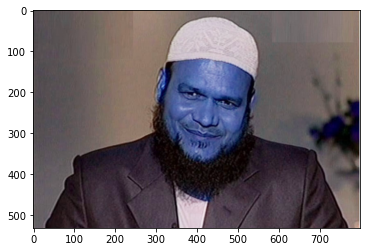

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(532, 800)

In [5]:
gray

array([[ 83,  82,  81, ..., 123, 160, 255],
       [ 81,  81,  81, ..., 123, 160, 255],
       [ 79,  80,  80, ..., 123, 160, 255],
       ...,
       [119,  93,  81, ..., 162, 176, 254],
       [119,  93,  81, ..., 158, 173, 254],
       [119,  93,  81, ..., 155, 171, 254]], dtype=uint8)

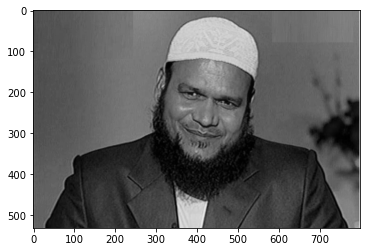

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[317, 136, 216, 216]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(317, 136, 216, 216)

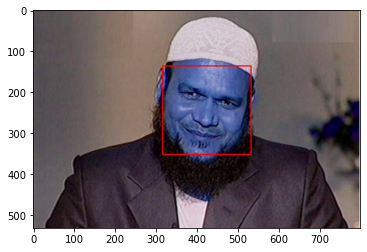

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

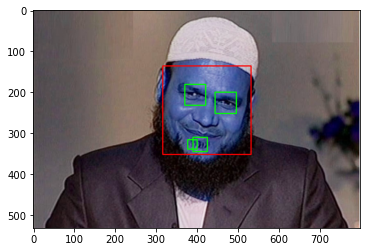

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

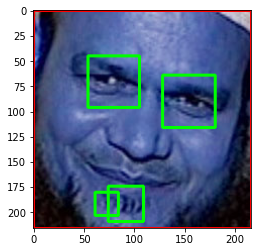

In [11]:
plt.imshow(roi_color, cmap='gray')

In [53]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

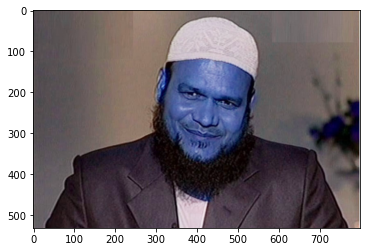

In [54]:
original_image = cv2.imread('./test_images/Biography Of Abdur Razzak Bin Yusuf.jpg')
plt.imshow(original_image)

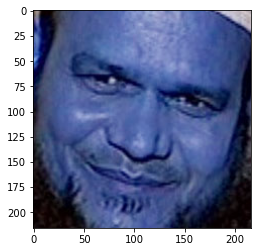

In [55]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Biography Of Abdur Razzak Bin Yusuf.jpg')
plt.imshow(cropped_image)

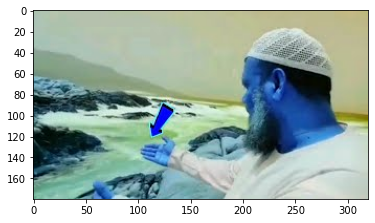

In [56]:
org_image_obstructed = cv2.imread('./test_images/Yousuff Profit Watch HD Mp4 Videos.jpg')
plt.imshow(org_image_obstructed)

In [57]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Yousuff Profit Watch HD Mp4 Videos.jpg')
cropped_image_no_2_eyes

In [58]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [82]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [83]:
img_dirs

['./dataset/abdur_razzak_bin_yousuf',
 './dataset/lionel_messi',
 './dataset/mashrafe_bin_mortaza',
 './dataset/roger_federer',
 './dataset/shakib_al_hasan',
 './dataset/virat_kohli']

In [84]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [89]:
import os
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        print(entry.path.split('/')[-1])
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

abdur_razzak_bin_yousuf
abdur_razzak_bin_yousuf\10 Abdur razzak bin yousuf 26 ideas.jpg
abdur_razzak_bin_yousuf\100 Nasir Media ideas in 2022 _ media (1).jpg
abdur_razzak_bin_yousuf\100 Nasir Media ideas in 2022 _ media.jpg
abdur_razzak_bin_yousuf\30 Lakh Jal Hadith by Abdur Razzak Bin.jpg
abdur_razzak_bin_yousuf\72 Fk dawah ideas _ youtube_ try again (1).jpg
abdur_razzak_bin_yousuf\72 Fk dawah ideas _ youtube_ try again.jpg
abdur_razzak_bin_yousuf\Abdulrazzaq Poster Watch HD Mp4 Videos.jpg
abdur_razzak_bin_yousuf\Abdur Razzak bin abdur Razzak bin.jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin usuf.jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin Yousuf (1).jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin Yousuf (10).jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin Yousuf (11).jpg
abdur_razzak_bin_yousuf\Abdur Razzak bin Yousuf (12).jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin Yousuf (13).jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin Yousuf (14).jpg
abdur_razzak_bin_yousuf\Abdur Razzak Bin Yousuf (15

abdur_razzak_bin_yousuf\sheikh abdur razzak bin yousuf from (2).jpg
abdur_razzak_bin_yousuf\Sheikh abdur razzak bin yousuf from.jpg
abdur_razzak_bin_yousuf\Sheikh abdur razzak bin yousuf new waz (1).jpg
abdur_razzak_bin_yousuf\Sheikh abdur razzak bin yousuf new waz.jpg
abdur_razzak_bin_yousuf\Sheikh Abdur Razzak Bin Yousuf.jpg
abdur_razzak_bin_yousuf\sheikh abdur razzak bin yusuf_ Latest.jpg
abdur_razzak_bin_yousuf\Shirk Abdur Razzak Bin Yousuf Watch HD.jpg
abdur_razzak_bin_yousuf\waz 2022 from abdul razzak bin yusuf.jpg
abdur_razzak_bin_yousuf\West Bengal government.jpg
abdur_razzak_bin_yousuf\WN - razzak (1).jpg
abdur_razzak_bin_yousuf\WN - razzak.jpg
abdur_razzak_bin_yousuf\Yousuff Profit Watch HD Mp4 Videos.jpg
lionel_messi
lionel_messi\02453493f852c0efe8ff951dea5845c4.jpg
lionel_messi\10_MESSI_JUGADORS-WEB.jpg
lionel_messi\1211643746.jpg.0.jpg
lionel_messi\136054219.jpg.0.jpg
lionel_messi\190703-lionel-messi.jpg
lionel_messi\20190804-The18-Image-Lionel-Messi-Speech-Camp-Nou-2019-1

mashrafe_bin_mortaza\The tale of Mashrafe Bin Mortaza_s.jpg
mashrafe_bin_mortaza\World Cup 2015_ Mashrafe Mortaza.jpg
mashrafe_bin_mortaza\World Cup_ Mashrafe Mortaza dedicates.jpg
roger_federer
roger_federer\03775a8e131301d9b53406c8f40fb10b.webp
Generating cropped images in folder:  ./dataset/cropped/roger_federer
roger_federer\07548250.jpg
roger_federer\106557207-1590765475629gettyimages-1202050340.jpeg
roger_federer\1163381732-850x560.webp
roger_federer\1256138.jpg
roger_federer\1517538862724.jpg
roger_federer\2012-07-08T174237Z_942697397_TB3E8781D6VJH_RTRMADP_3_TENNIS-WIMBLEDON.jpg
roger_federer\20170429_Match_for_Africa_149.jpg
roger_federer\20180816161600_139.jpg
roger_federer\51f465e41dbadc549abdd64ba7ee166d.jpg
roger_federer\55d4aba6a570417280c790d119c91ee7_18.jpg
roger_federer\5c6becd02628985d2a2ee2a2.jfif
roger_federer\643791-641790-roger-federer-aus-open-2018-afp.jpg
roger_federer\833491-jzwrfgakxz-1491130217.jpg
roger_federer\88m_ilrAGFA.jpg
roger_federer\901027-715352-6921

shakib_al_hasan\Shakib elated after _first_ win.jpg
shakib_al_hasan\Shakib first to 1000 runs_100 wickets.jpg
shakib_al_hasan\Shakib_s 34th Birthday_ 34 achievements.jpg
shakib_al_hasan\stock manipulation.jpg
shakib_al_hasan\T20 WC 2021 Eng vs Ban _ Shakib Al.jpg
shakib_al_hasan\T20 World Cup 2021_ Shakib-Al-Hasan.jpg
shakib_al_hasan\T20 World Cup 2022_ Shakib Al Hasan.jpg
shakib_al_hasan\T20 World Cup_ Shakib Al Hasan-led.jpg
shakib_al_hasan\T20I rankings - Shakib Al Hasan.jpg
shakib_al_hasan\trophy unveiling.jpg
shakib_al_hasan\Watch_ Shakib Al Hasan uproots stumps.jpg
virat_kohli
virat_kohli\02fa06cf94.jpg
virat_kohli\05b9bac90a.jpg
virat_kohli\088db66e0b.jpg
virat_kohli\0b43460429.jpg
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
virat_kohli\0b53cce8c6.jpg
virat_kohli\0eb2230fbf.jpg
virat_kohli\1146943f73.jpg
virat_kohli\132a62a742.jpg
virat_kohli\150fc612d2.jpg
virat_kohli\1fee075645.jpg
virat_kohli\2018439965.jpg
virat_kohli\266f9eacf3.jpg
virat_kohli\27ad99